<a href="https://colab.research.google.com/github/Schauhan21/MV/blob/main/MV_A3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Vision<br>Assignment 3 - Binary image analysis

## Personal details

* **Name(s):** `SUBAM CHAUHAN.`
* **Student ID(s):** `2771463.`

## 1. Introduction

In this assignment, we will implement a simple segmentation method. Given an image of a jigsaw puzzle (Figure 1), the goal is to separate the puzzle pieces from the background. This can be done by choosing a global threshold that separates dark and light pixels. You need to implement Otsu's method that can find the threshold automatically based on the grayscale histogram of the image. After the segmentation, we perform post-processing to further improve the result.



Let us start by displaying the test image and the corresponding grayscale histogram.

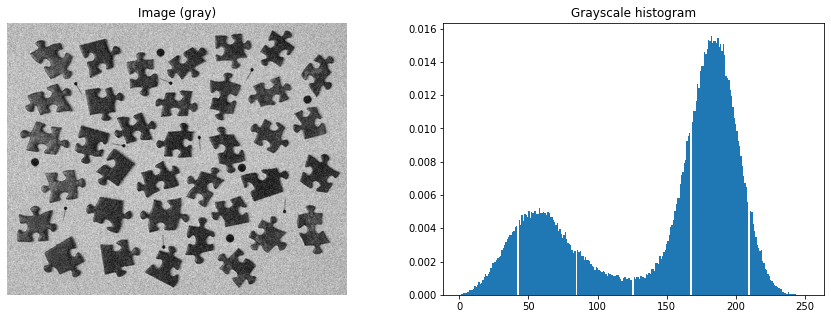

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

img = cv2.imread('puzzle.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.title('Image (gray)')
plt.imshow(gray, cmap='gray')
plt.axis('off')
plt.subplot(122)
plt.title('Grayscale histogram')
h = plt.hist(gray.ravel(),256, density=True)

## 2. Preprocessing

Notice that the image is quite noisy. This will make the segmentation more challenging. Before we continue with the segmentation, we want to reduce the noise. We will use the bilateral filter as it has the property of preserving edges and details.

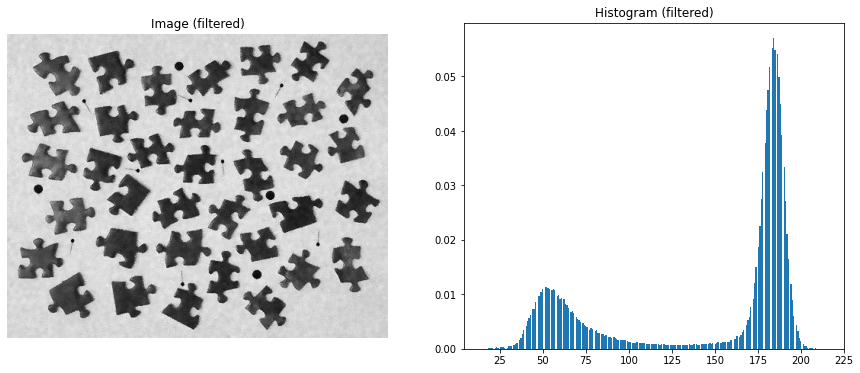

In [ ]:
filt = cv2.bilateralFilter(gray,9,30,30)

plt.figure(figsize=(15,6))
plt.subplot(121)
plt.title('Image (filtered)')
plt.imshow(filt, cmap='gray')
plt.axis('off')
plt.subplot(122)
plt.title('Histogram (filtered)')
h2 = plt.hist(filt.ravel(),256, density=True)

## 3. Manual segmentation

Now that we have filtered the image, we continue with the segmentation. A pixel should be classified as foreground if its intensity is less than a threshold value. We can see from the histogram that a good threshold value is somewhere between the peaks (in the valley). Let us pick a threshold $t=125$ and segment the image. We use the OpenCV function __[`threshold()`](https://docs.opencv.org/2.4/modules/imgproc/doc/miscellaneous_transformations.html#threshold)__.

(-0.5, 499.5, 399.5, -0.5)

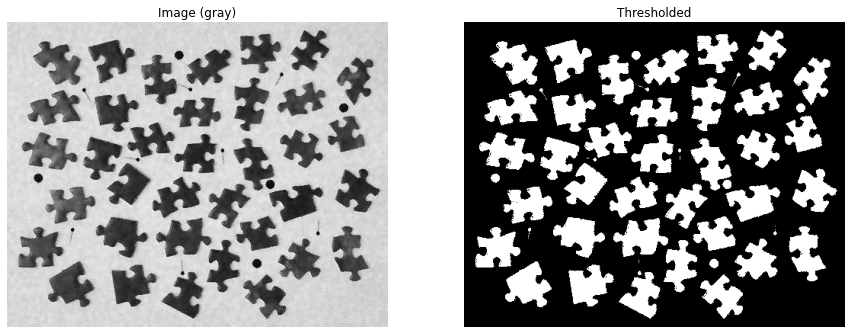

In [ ]:
t = 125
ret,thresh = cv2.threshold(filt,t,255,cv2.THRESH_BINARY_INV)

plt.figure(figsize=(15,6))
plt.subplot(121)
plt.imshow(filt, cmap='gray')
plt.title('Image (gray)')
plt.axis('off')
plt.subplot(122)
plt.imshow(thresh, cmap='gray')
plt.title('Thresholded')
plt.axis('off')

## 4. Otsu's method

In the previous task, we chose the threshold manually. Otsu's method aims to do this automatically by looking at the histogram $P(i)$. It choses the threshold $t$ that minimizes the within-group variance defined as

$$
\sigma_w^2(t) = q_1(t) \sigma_1^2(t) + q_2(t) \sigma_2^2(t),\qquad (1)
$$

where $q_1(t)$ and $q_2(t)$ are the sums of histogram values

$$
q_1(t) = \sum_{i=0}^{t-1} P(i) \qquad q_2(t) = \sum_{i=t}^{I-1} P(i) \qquad (2)
$$

and $\sigma_1^2(t)$ and $\sigma_2^2(t)$ are variances

$$
\sigma_1^2(t) = \sum_{i=0}^{t-1} [i - \mu_1(t)]^2 \frac{P(i)}{q_1(t)}  \qquad \sigma_2^2(t) = \sum_{i=t}^{I-1} [i - \mu_2(t)]^2 \frac{P(i)}{q_2(t)}. \qquad (3)
$$

The mean values of the two distributions are

$$
\mu_1(t) = \sum_{i=0}^{t-1} \frac{i P(i)}{q_1(t)}  \qquad \mu_2(t) = \sum_{i=t}^{I-1} \frac{i P(i)}{q_2(t)}. \qquad (4)
$$

In practise, we need to compute $\sigma_w^2(t)$ (Eq.1) for all possible $t$ values and choose the threshold that gives the smallest within-group variance.

**4.1 Compute within-group variance** $\quad$ <font color=red>(2.00 points)</font>

Complete the function *computeGroupVariance()* in the following code cell. The function should return the within-group variance $\sigma_w^2(t)$ for a given threshold value. Your implementation is correct if you obtain $\sigma_w^2(t) \approx 176.7$ when threshold $t=125$. Moreover, $\mu_1 \approx 63.3$ and $\mu_2 \approx 181.9$. Check that your implementation does not raise errors with any threshold value in range $[0,255]$. Particularly, you want to ensure that $q_1$ and $q_2$ are always positive (by adding a small constant) to avoid division by zero when implementing Equations 3 and 4.

In [ ]:
# INPUTS
# P : Histogram probabilities (255x1 vector)
# t : Threshold value (scalar between [0,255])
#
# OUTPUT
# varw  : Within-group variance (scalar)
#
def computeGroupVariance(P,t):
    
    # The following line can be removed
    
      
    # ---------- YOUR CODE STARTS HERE -----------
    q1 = np.sum(P[:t])
    q2 = np.sum(P[t:])
    i1 = np.arange(0,t,1)
    i2 = np.arange(t,255,1)
    mean1 = np.sum(i1*P[:t])/q1
    mean2 = np.sum(i2*P[t:])/q2

    var1 = np.sum(((i1 - mean1)**2)*P[:t])/q1
    var2 = np.sum(((i2 - mean2)**2)*P[t:])/q2 
    
    varw = q1*var1 + q2*var2
    # ----------- YOUR CODE ENDS HERE ------------
    
    return varw


bins = np.arange(0,256,1)
P = np.histogram(filt.ravel(),bins,density=True)[0]

t = 125 # Threshold
varw = computeGroupVariance(P,t)
print("Within-group variance = %f (threshold %d)" %(varw,t))

Within-group variance = 176.726245 (threshold 125)


In [ ]:
# LEAVE EMPTY

**4.2 Find threshold**

Next we are going to use the function to compute within-group variances for all thresholds. Then, we will choose the threshold that gives the smallest within-group variance. The threshold found using Otsu's method should be close to the threshold we picked manually.

Threshold = 0 (within-group variance nan)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in double_scalars


(-0.5, 499.5, 399.5, -0.5)

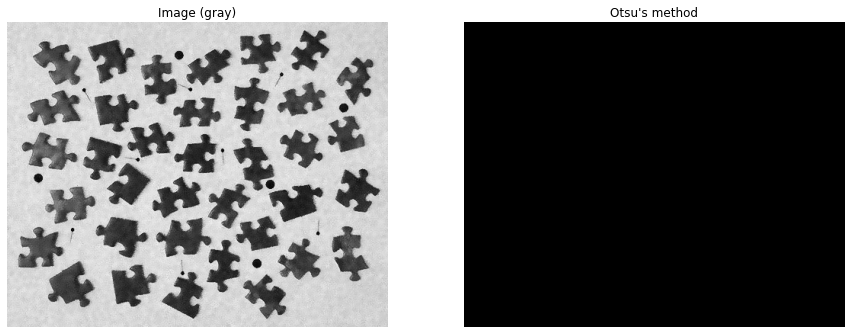

In [ ]:
thresholds = np.arange(256)
varws = np.zeros(256, dtype=np.float32)

for idx, t in enumerate(thresholds):
    varw = computeGroupVariance(P,t)
    varws[idx] = varw
    
t = np.argmin(varws)
print("Threshold = %d (within-group variance %f)" %(t,varws[t]))

ret,thresh = cv2.threshold(filt,t,255,cv2.THRESH_BINARY_INV)
plt.figure(figsize=(15,6))
plt.subplot(121)
plt.imshow(filt, cmap='gray')
plt.title('Image (gray)')
plt.axis('off')
plt.subplot(122)
plt.imshow(thresh, cmap='gray')
plt.title("Otsu's method")
plt.axis('off')

**4.3 OpenCV implementation**

To ensure that our implementation is correct, we compare the result to OpenCV's implementation of Otsu's method. The obtained threshold should be similar ($\pm$ 1 difference is fine). 

(-0.5, 499.5, 399.5, -0.5)

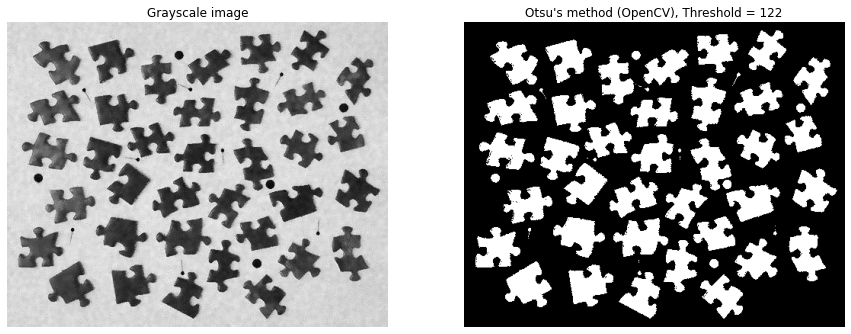

In [ ]:
ret, otsu = cv2.threshold(filt,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

plt.figure(figsize=(15,6))
plt.subplot(121)
plt.imshow(filt, cmap='gray')
plt.title('Grayscale image')
plt.axis('off')
plt.subplot(122)
plt.imshow(otsu, cmap='gray')
plt.title("Otsu's method (OpenCV), Threshold = %d" %ret)
plt.axis('off')

## 5. Post-processing (optional)

At this point, the segmentation result should look pretty good. A closer inspection reveals that there are small holes, noise and unwanted objects in the segmentation. Next, we will further improve the segmentation.

**5.1 Morphological operations**

We use morphological closing to fill small holes. Then, we will remove small objects (noise) using morphological opening. Note that we are not able to remove all unwanted objects. We will take care of those in the next section.

(-0.5, 499.5, 399.5, -0.5)

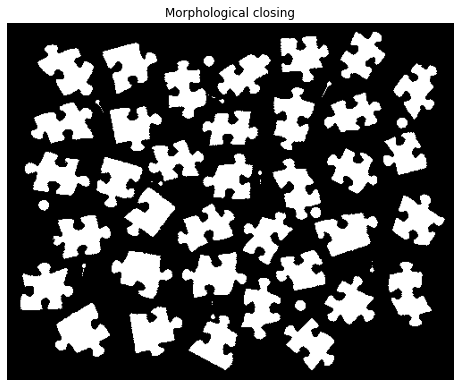

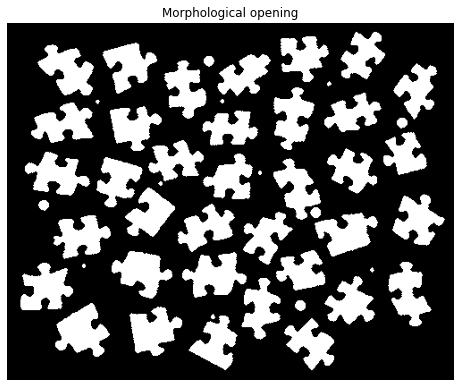

In [ ]:
sel1 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
closing = cv2.morphologyEx(otsu, cv2.MORPH_CLOSE, sel1)

plt.figure(figsize=(8,8))
plt.imshow(closing, cmap='gray')
plt.title('Morphological closing')
plt.axis('off')

sel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
opening = cv2.morphologyEx(closing, cv2.MORPH_OPEN, sel2)

plt.figure(figsize=(8,8))
plt.imshow(opening, cmap='gray')
plt.title('Morphological opening')
plt.axis('off')

**5.2 Connected component labeling**

The following code gives an unique label to each connected component in the binary image. It also extracts the contours of the objects. Notice that we still have more objects than we have puzzle pieces.

(-8.700000000000003, 512.7, 406.85, -7.850000000000001)

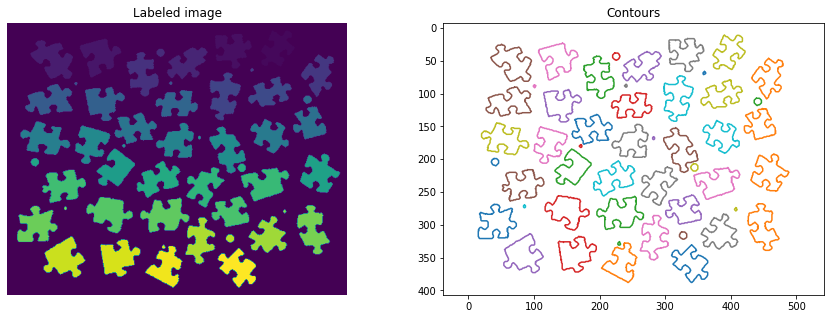

In [ ]:
ret, labels = cv2.connectedComponents(opening)
cnt,_ = cv2.findContours(opening, 1, 1)
#_,cnt,_ = cv2.findContours(opening, 1, 1) # For older OpenCV versions

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.imshow(labels)
plt.title('Labeled image')
plt.axis('off')
plt.subplot(122)
for i in range(len(cnt)):
    plt.plot(cnt[i][:,0,0],cnt[i][:,0,1])
plt.gca().invert_yaxis()
plt.title('Contours')
plt.axis('equal')


**5.3 Remove small ojects**

As a final step, we want to remove those unwanted round objects. Luckily, they are much smaller than the puzzle pieces. We will compute the area of each contour __[`contourArea()`](https://docs.opencv.org/4.2.0/d3/dc0/group\_\_imgproc\_\_shape.html#ga2c759ed9f497d4a618048a2f56dc97f1)__ and keep objects, which area is more than 500. In the end, there are 36 objects in total (each jigsaw piece represents an object).

(-0.5, 499.5, 399.5, -0.5)

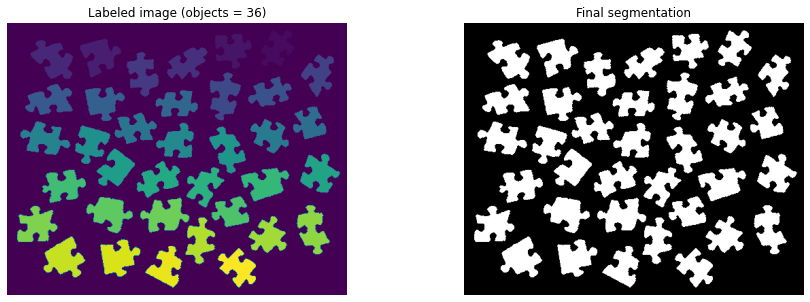

In [ ]:
# This will be the final result (binary image)
final = np.zeros_like(otsu)

for i in range(len(cnt)):
    area = cv2.contourArea(cnt[i])
    if (area > 500):
        cv2.drawContours(final, cnt, i, 255, thickness=-1)

ret, labels_final = cv2.connectedComponents(final)
cnt_final,_ = cv2.findContours(final, 1, 1)
#_,cnt_final,_ = cv2.findContours(final, 1, 1) # For older OpenCV versions

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.imshow(labels_final)
plt.title('Labeled image')
plt.title("Labeled image (objects = %d)" %len(cnt_final))
plt.axis('off')
plt.subplot(122)
plt.imshow(final, cmap='gray')
plt.title('Final segmentation')
plt.axis('off')


**5.4 More advanced methods**

Our test image was relatively easy to segment. This was mainly because the background was much brighter compared to the puzzle pieces. If the background was different color, the segmentation might not work anymore. In such case, one could utilize some color-based segmentation method, such as the one from the previous assignment. If the puzzle pieces were touching each other, it would cause another challenge. We might be able to separate the pieces from the background but the individual pieces would be difficult to extract (connected component labeling) as the segmented regions might be overlapping. The __[`watershed()`](https://docs.opencv.org/2.4/modules/imgproc/doc/miscellaneous_transformations.html#watershed)__ algorithm is a classical method that is often used to segment overlapping objects. Furthermore, OpenCV also offers __[`grabCut()`](https://docs.opencv.org/2.4/modules/imgproc/doc/miscellaneous_transformations.html#grabcut)__ segmentation method, which is based on graph cuts.

# Aftermath
Finally, fill your answers to the following questions:

**How much time did you need to complete this exercise?**

`REPLACE THIS TEXT WITH YOUR ANSWER.`

**Did you experience any problems with the exercise? Was there enough help available? Should this notebook be more (or less) detailed?**

`REPLACE THIS TEXT WITH YOUR ANSWER.`

# References
`LIST YOUR POSSIBLE REFERENCES HERE!`

# Submission

1. Click on the menu `Kernel -> Restart & Clear Output` to clear all outputs and variables, etc.
2. Compress the resulting Jupyter notebook (`MV_A3.ipynb` file) into **`MV_A3_[student number(s)].zip`** (e.g. `MV_A3_1234567.zip` if solo work or `MV_A3_1234567-7654321.zip` if pair work).
3. Upload the .zip file to Moodle. The return box can be found in the assignments section.

**Deadline of the assignment 2.2.2022**